In [1]:
import ipyparallel as ipp
from ipyparallel.util import interactive
import matplotlib.pyplot as plt
import pickle

In [2]:
from EM import EM
from plot import plot
import numpy as np

In [3]:
# em_list has the em object for multiple runs
def print_coeff(em_list, signal_name, plot_loglik=True, plot_mse=True):
    if signal_name == 'inr':
        num_past_effects = 3
    else:
        num_past_effects = 2
    num_iter = len(em_list)
    treatment_names, chronic_keywords, demographic_names = signal_context[signal_name]
    A = np.zeros((num_iter, num_past_effects, len(treatment_names.keys())))
    b = np.zeros((num_iter, len(chronic_keywords) + len(demographic_names)))
    transition_std = np.zeros(num_iter)
    observation_std = np.zeros(num_iter)
    initial_state_std = np.zeros(num_iter)
    initial_state_mean = np.zeros(num_iter)
    mse_list = []
    loglik_list = []
    intercept = []
    for i, em in enumerate(em_list):
        A[i, :, :] = em.A
        b[i, :] = em.b
        initial_state_mean[i] =  em.init_z
        initial_state_std[i] = np.sqrt(em.sigma_0)
        transition_std[i] = np.sqrt(em.sigma_1)
        observation_std[i] = np.sqrt(em.sigma_2)
        mse_list.append(em.mse)
        loglik_list.append(em.obs_log_lik)
        intercept.append(em.intercept)
    
    print('{} coefficients averaged over {} runs'.format(signal_name, num_iter))
    for i, treatment in enumerate(treatment_names.keys()):
        print('{}: {}'.format(treatment, np.round(np.average(A, axis=0)[:, i], 4)))
        if num_iter > 1:
            print('Std of {}: {}'.format(treatment, np.round(np.std(A, axis=0)[:, i], 4)))
    static_types = chronic_keywords + demographic_names
    for j, static in enumerate(static_types):
        print('{}: {}'.format(static, np.round(np.average(b, axis=0)[j], 4)))
        if num_iter > 1:
            print('Std of {}: {}'.format(static, np.round(np.std(b, axis=0)[j], 4)))
    print('initial state mean: {}'.format(np.round(np.average(initial_state_mean), 4)))
    print('initial state std: {}'.format(np.round(np.average(initial_state_std), 4)))
    print('transition noise (std): {}'.format(np.round(np.average(transition_std), 4)))
    print('observation noise (std): {}'.format(np.round(np.average(observation_std), 4)))
    if num_iter > 1:
        print('Std of initial state mean: {}'.format(np.round(np.std(initial_state_mean), 4)))
        print('Std of initial state std: {}'.format(np.round(np.std(initial_state_std), 4)))
        print('Std of transition noise (std): {}'.format(np.round(np.std(transition_std), 4)))
        print('Std of observation noise (std): {}'.format(np.round(np.std(observation_std), 4)))
    
    if plot_loglik:
        for loglik in loglik_list:
            plt.plot([i for i in range(len(loglik))], loglik)
            plt.xlabel('Iterations')
            plt.ylabel('Observed data log likelihood')
            plt.title('EM log likelihood of {}'.format(signal_name))
            plt.show()
    if plot_mse:
        for mse in mse_list:
            plt.plot([i for i in range(len(mse))], mse)
            plt.xlabel('Iterations')
            plt.ylabel('MSE')
            plt.title('Prediction MSE of {}'.format(signal_name))
            plt.show()

In [4]:
signal_context = pickle.load(open('../Data/signal_context.pkl', 'rb'))

In [5]:
all_signals = list(signal_context.keys())

In [6]:
all_signals

['creatinine', 'inr', 'platelets', 'lactate', 'bun']

In [7]:
training_pct = .8
single_effect = False

### Sequential Training (better for testing model change)

In [11]:
%%time
signal_name = 'bun'
num_past_effects = 2
data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
sequential_results = [] # store the em object after training
for i in range(1):
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect, init_0=.001)
    em.run_EM(10000)
    print('Finish run {} for {}'.format(i+1, signal_name))
    sequential_results.append(em)
#pickle.dump(all_params, open('../Data/est_params.pkl', 'wb'))

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

iteration 1168
iteration 1169
iteration 1170
iteration 1171
iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 

iteration 1715
iteration 1716
iteration 1717
iteration 1718
iteration 1719
iteration 1720
iteration 1721
iteration 1722
iteration 1723
iteration 1724
iteration 1725
iteration 1726
iteration 1727
iteration 1728
iteration 1729
iteration 1730
iteration 1731
iteration 1732
iteration 1733
iteration 1734
iteration 1735
iteration 1736
iteration 1737
iteration 1738
iteration 1739
iteration 1740
iteration 1741
iteration 1742
iteration 1743
iteration 1744
iteration 1745
iteration 1746
iteration 1747
iteration 1748
iteration 1749
iteration 1750
iteration 1751
iteration 1752
iteration 1753
iteration 1754
iteration 1755
iteration 1756
iteration 1757
iteration 1758
iteration 1759
iteration 1760
iteration 1761
iteration 1762
iteration 1763
iteration 1764
iteration 1765
iteration 1766
iteration 1767
iteration 1768
iteration 1769
iteration 1770
iteration 1771
iteration 1772
iteration 1773
iteration 1774
iteration 1775
iteration 1776
iteration 1777
iteration 1778
iteration 1779
iteration 1780
iteration 

KeyboardInterrupt: 

bun coefficients averaged over 1 runs
dialysis: [-13.6772  -8.961 ]
diuretic: [0.5432 0.4412]
drugs_increase: [-0.5363 -0.4034]
chronic_kidney: 24.8706
kidney_cancer: 10.3211
renal: 10.6144
esrd: 16.2005
heart_failure: 9.4382
liver: 7.8225
initial state mean: 18.8559
initial state std: 20.4615
transition noise (std): 5.9264
observation noise (std): 0.3121


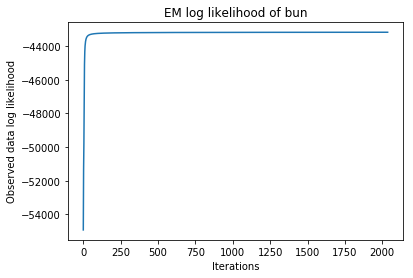

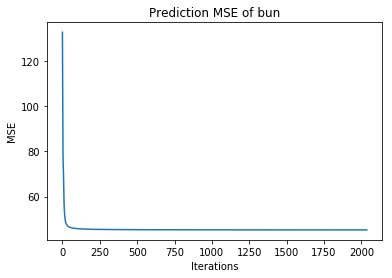

In [13]:
print_coeff([em], 'bun')

In [12]:
print_coeff(sequential_results, signal_name)

bun coefficients averaged over 0 runs
dialysis: [nan nan]
diuretic: [nan nan]
drugs_increase: [nan nan]
chronic_kidney: nan
kidney_cancer: nan
renal: nan
esrd: nan
heart_failure: nan
liver: nan
initial state mean: nan
initial state std: nan
transition noise (std): nan
observation noise (std): nan


/home/bear/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/bear/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/bear/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Parallel Training (better for generating whole set of coefficients)

In [7]:
rc = ipp.Client(profile='myprofile')

/home/bear/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@brahms')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [8]:
rc.ids

[0, 1, 2, 3, 4, 5, 6, 7]

In [9]:
dview = rc[:]

In [10]:
import os
import signal
engine_pids = rc[:].apply(os.getpid).get_dict()

def signal_engine(engine_id, sig=signal.SIGINT):
    """send a signal to a local engine"""
    pid = engine_pids[engine_id]
    os.kill(pid, sig)

In [11]:
with dview.sync_imports():
    import numpy
%px np = numpy 

importing numpy on engine(s)


In [59]:
# cross validation on the initialization of b and sigma 0
def cv_init(args):
    import importlib
    import EM
    importlib.reload(EM)
    from EM import EM

    signal_name, init_0 = args
    data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], J=2, K=0, train_pct=.8, X_prev_given=True,
        X_prev = data['X_prev_mtx'], init_0=init_0)
    em.run_EM(20000)
    return em

In [60]:
init_0_choices = [.001, .01, .1, 1]
test_signals = ['creatinine', 'bun']
grouped_args = [(signal, init_0) for signal in test_signals for init_0 in init_0_choices]

In [61]:
cv_params = dview.map(cv_init, grouped_args)

In [ ]:
cv_params.wait_interactive()

   0/8 tasks finished after  103 s

initial sigma 0: 0.001
creatinine coefficients averaged over 1 runs
dialysis: [0.2455 0.1089]
nephrotoxic_drugs: [ 0.6694 -0.0824]
dronedarone: [ 0.2845 -0.0423]
diuretic: [0.3193 0.0979]
ace_i: [0.3301 0.0518]
arb: [0.1527 0.0716]
chronic_kidney: 1.6521
kidney_cancer: 0.1525
renal: 0.1925
esrd: 1.9139
sickle_cell: 0.9874
gender: 0.5597
admit_weight: -0.0152
initial state mean: 0.861
initial state std: 0.46
transition noise (std): 0.9853
observation noise (std): 1.3988


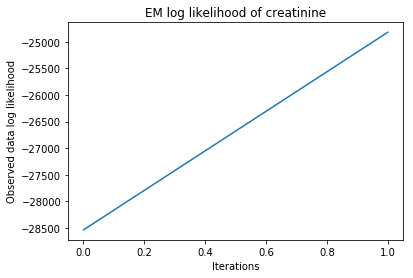

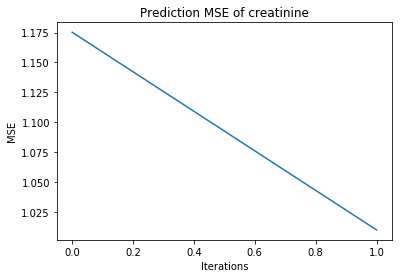

initial sigma 0: 0.01
creatinine coefficients averaged over 1 runs
dialysis: [-0.6325 -0.2975]
nephrotoxic_drugs: [ 0.1319 -0.0022]
dronedarone: [0.0651 0.055 ]
diuretic: [0.0833 0.0365]
ace_i: [0.0793 0.0385]
arb: [0.0767 0.0401]
chronic_kidney: 0.5213
kidney_cancer: 0.017
renal: 0.0741
esrd: 0.7062
sickle_cell: 0.3014
gender: 0.1249
admit_weight: -0.0102
initial state mean: 2.25
initial state std: 1.7814
transition noise (std): 0.2962
observation noise (std): 0.488


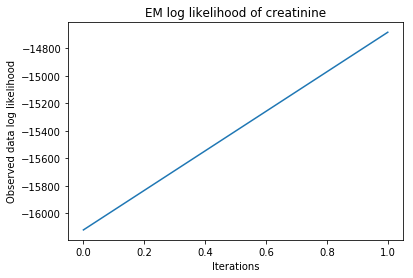

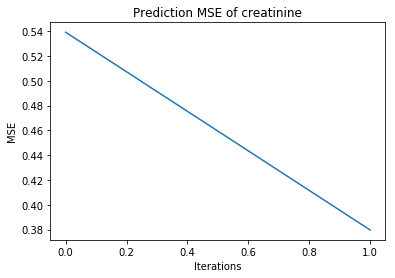

initial sigma 0: 0.1
creatinine coefficients averaged over 1 runs
dialysis: [-0.7098 -0.2638]
nephrotoxic_drugs: [ 0.0235 -0.0095]
dronedarone: [-0.0127  0.0571]
diuretic: [ 0.0308 -0.0071]
ace_i: [0.0124 0.0075]
arb: [0.0316 0.0045]
chronic_kidney: 0.1142
kidney_cancer: -0.0181
renal: 0.0356
esrd: 0.1988
sickle_cell: 0.0549
gender: 0.0286
admit_weight: -0.0045
initial state mean: 2.0549
initial state std: 2.0421
transition noise (std): 0.2643
observation noise (std): 0.2702


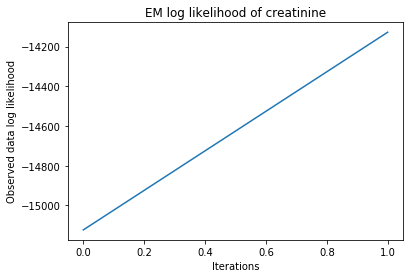

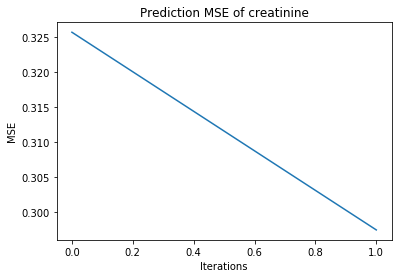

initial sigma 0: 1
creatinine coefficients averaged over 1 runs
dialysis: [-0.9567 -0.6029]
nephrotoxic_drugs: [-0.011  -0.0194]
dronedarone: [0.0045 0.1021]
diuretic: [ 0.0218 -0.0001]
ace_i: [-0.0026 -0.0071]
arb: [0.021 0.016]
chronic_kidney: 0.0505
kidney_cancer: -0.0199
renal: 0.0203
esrd: 0.1589
sickle_cell: -0.002
gender: -0.0069
admit_weight: -0.0022
initial state mean: 1.8626
initial state std: 1.9682
transition noise (std): 0.1393
observation noise (std): 0.4019


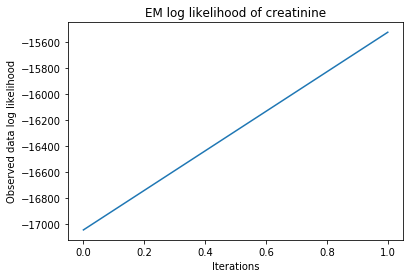

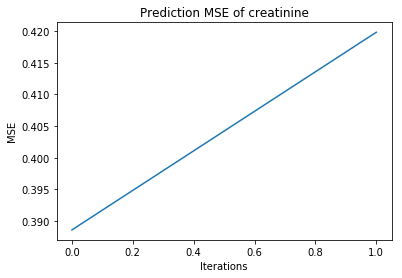

initial sigma 0: 0.001
bun coefficients averaged over 1 runs
dialysis: [-2.4795 -1.7317]
diuretic: [3.065  0.6938]
drugs_increase: [5.8796 0.1641]
chronic_kidney: 14.3972
kidney_cancer: 3.2156
renal: 4.3812
esrd: 6.2058
heart_failure: 2.8954
liver: 1.7303
initial state mean: 13.0692
initial state std: 7.8817
transition noise (std): 6.7136
observation noise (std): 11.9909


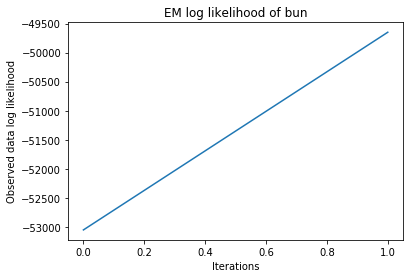

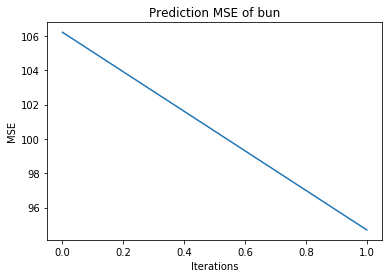

initial sigma 0: 0.01
bun coefficients averaged over 1 runs
dialysis: [-7.547  -4.4091]
diuretic: [0.4191 0.6406]
drugs_increase: [ 1.6934 -0.0128]
chronic_kidney: 5.791
kidney_cancer: 0.9959
renal: 1.7183
esrd: 3.0856
heart_failure: 1.1316
liver: 0.6601
initial state mean: 24.6696
initial state std: 17.88
transition noise (std): 3.7221
observation noise (std): 6.2648


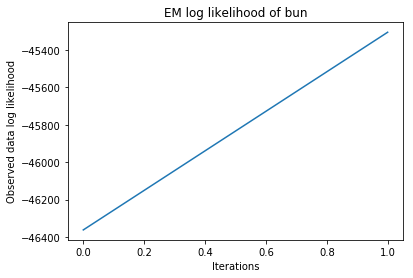

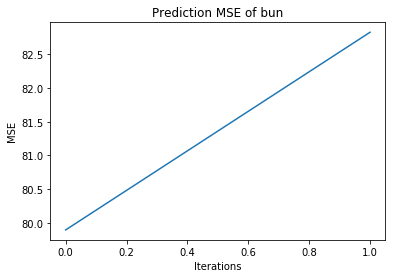

initial sigma 0: 0.1
bun coefficients averaged over 1 runs
dialysis: [-4.8245 -1.5067]
diuretic: [0.1426 0.054 ]
drugs_increase: [ 0.0651 -0.0636]
chronic_kidney: 0.6316
kidney_cancer: 0.0228
renal: 0.2022
esrd: 0.7049
heart_failure: 0.0895
liver: 0.0796
initial state mean: 29.0147
initial state std: 22.2127
transition noise (std): 4.7196
observation noise (std): 1.8984


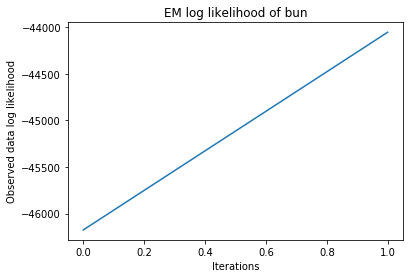

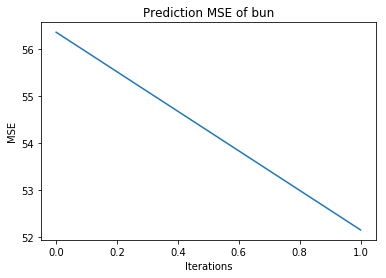

initial sigma 0: 1
bun coefficients averaged over 1 runs
dialysis: [-7.7038 -3.5871]
diuretic: [0.069  0.1252]
drugs_increase: [-0.1097 -0.1167]
chronic_kidney: 0.3446
kidney_cancer: -0.1306
renal: 0.169
esrd: 0.9743
heart_failure: -0.0084
liver: 0.0611
initial state mean: 28.6473
initial state std: 21.652
transition noise (std): 3.8527
observation noise (std): 2.9134


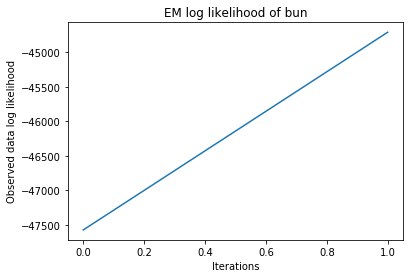

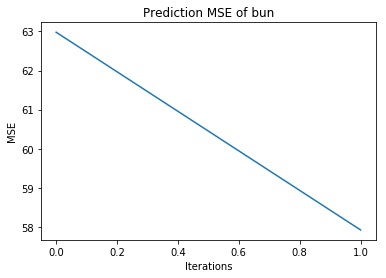

In [58]:
for i, arg in enumerate(grouped_args):
    print('initial sigma 0: {}'.format(arg[1]))
    print_coeff([cv_params.get()[i]], arg[0])

In [ ]:
# run em on a given signal
# return em object after convergence
def run_em_on_signal(signal_name):
    #import sys
    #sys.path.insert(0, '/home/bear/Documents/Counterfactual-Prediction/EM.py')
    import importlib
    import EM
    importlib.reload(EM)
    from EM import EM
    
    training_pct = .8
    single_effect = False
    if signal_name == 'inr':
        num_past_effects = 3
    else:
        num_past_effects = 2
    #treatment_names, chronic_keywords, demographic_names = signal_context[signal_name]
    data = np.load('../Data/'+signal_name+'_preprocessed_data.npz')
    em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect)
    em.run_EM(10000)
    return em

In [ ]:
all_signals_params = dview.map(run_em_on_signal, all_signals)

In [ ]:
for i, signal_name in enumerate(all_signals):
    print_coeff([all_signals_params[i]], signal_name)

In [ ]:
random_patients = np.random.randint(0, em.y.shape[0], 20)
for i in random_patients:
    plot(em, i, 12, signal_name, treatment_types=list(treatment_names.keys()))

### Analysis
Changes
* Only select patients with at least 4 training observations (total of 1821)

On real data
* Issues:
    * treatments coefficients are negative while they should be positive
        * changing initialization doesn't seem to help as model converges in bad local min, and most directions still don't change
    * observation noise is bigger than transition noise
    * run time is long, each iteration takes 4s, M step takes 2.5s, loglik takes 1s
* Reasons:
    * The increasing effects of treatments are not pronouced in the data (see Source Data Analysis)
        * it makes sense that nsaid and aspirin shows small number close to zero since their effects are 50-50.
        * transfusion platelet should be more negative than others, also makes sense.
        * the first number for plasma is a very negative number, but should be close to zero
        * anticoagulant are more negative than platelet, but should be more similar
    * bad noise estimation is expected, specifically underestimated initial state variance and overestimated observational noise 
    
On simulation
* Issues
    * b seems to be harder to identify correctly compared to A (sensitive to initialization)
    * estimated sigma 0 and sigma 2 are very different from the true value (not sensitive to initialization)
        * underestimate sigma 0, overestimate sigma 2
* Reasons
   